In [ ]:
import pandas as pd
from collections import Counter
import itertools


# visual libraries
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

# Load the csv file

dataframe = pd.read_csv("/content/cdr.csv")
dataframe.head()

,Phone Number,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,CustServ Calls
0,382-4657,128,25,265.1,110,45.07,197.4,99.0,16.78,244.7,91.0,11.01,1.0
1,371-7191,107,26,161.6,123,27.47,195.5,103.0,16.62,254.4,103.0,11.45,1.0
2,358-1921,137,0,243.4,114,41.38,121.2,110.0,10.30,162.6,104.0,7.32,0.0
3,375-9999,84,0,299.4,71,50.90,61.9,88.0,5.26,196.9,89.0,8.86,2.0
4,330-6626,75,0,166.7,113,28.34,148.3,122.0,12.61,186.9,121.0,8.41,3.0


In [ ]:
dataframe.isnull().values.any()

True

In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataframe["Phone Number"] = le.fit_transform(dataframe["Phone Number"])
dataframe

,Phone Number,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,CustServ Calls
0,1926,128,25,265.1,110,45.07,197.4,99.0,16.78,244.7,91.0,11.01,1.0
1,1575,107,26,161.6,123,27.47,195.5,103.0,16.62,254.4,103.0,11.45,1.0
2,1117,137,0,243.4,114,41.38,121.2,110.0,10.30,162.6,104.0,7.32,0.0
3,1707,84,0,299.4,71,50.90,61.9,88.0,5.26,196.9,89.0,8.86,2.0
4,110,75,0,166.7,113,28.34,148.3,122.0,12.61,186.9,121.0,8.41,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16764,3789,22,0,282.8,22,22.82,208.2,226.0,22.28,228.2,209.0,22.88,2.0
16765,4526,98,22,262.2,222,22.20,282.2,88.0,22.22,260.2,92.0,2.22,2.0
16766,5187,208,0,228.8,282,80.82,289.0,26.0,26.02,229.2,202.0,8.82,0.0
16767,3671,288,0,282.2,82,28.29,229.0,208.0,20.22,280.0,200.0,8.20,0.0


In [ ]:
dataframe["CustServ Calls"].describe()

count    16768.000000
mean         2.487774
std          2.227711
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          9.000000
Name: CustServ Calls, dtype: float64

In [ ]:
All = dataframe.shape[0]
fraud = dataframe[dataframe['CustServ Calls'] == 1]
nonFraud = dataframe[dataframe['CustServ Calls'] == 0]

x = len(fraud)/All
y = len(nonFraud)/All

print('frauds :',x*100,'%')
print('non frauds :',y*100,'%')

frauds : 7.042757469139484 %
non frauds : 20.91955393881567 %


Text(0, 0.5, 'Frequency')

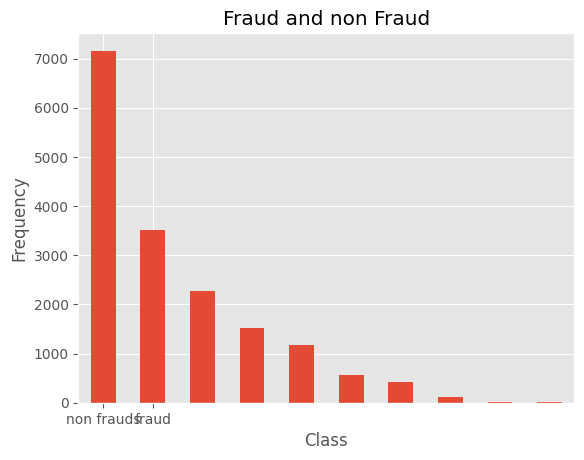

In [ ]:
# Let's plot the calls gainst the Frequency
labels = ['non frauds','fraud']
classes = pd.value_counts(dataframe['CustServ Calls'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Fraud and non Fraud")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

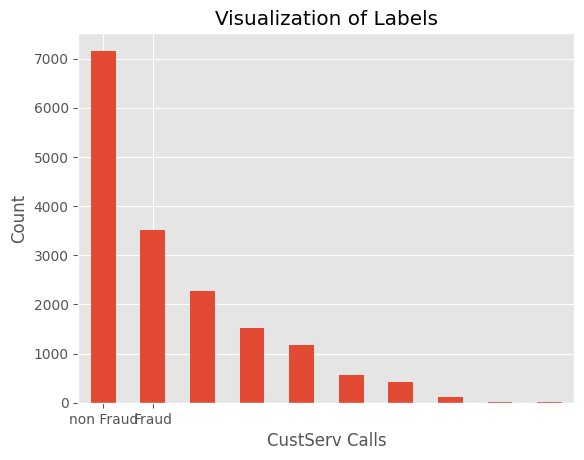

In [ ]:
import matplotlib.pyplot as plt

labels = ["non Fraud", "Fraud"]
count_classes = dataframe.value_counts(dataframe['CustServ Calls'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataframe["NormalizedAmount"] = scaler.fit_transform(dataframe["CustServ Calls"].values.reshape(-1, 1))
#dataframe.drop(["Amount", "Time"], inplace= True, axis= 1)

Y = dataframe["CustServ Calls"]
X = dataframe.drop(["CustServ Calls"], axis= 1)

In [ ]:
from sklearn.model_selection import train_test_split

(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (11738, 13)
Shape of test_X:  (5031, 13)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Decision Tree
decision_tree = DecisionTreeClassifier()

# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)

In [ ]:
decision_tree.fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100

random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100

print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)

ValueError: ignored